In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
dups = df.duplicated()

In [8]:
dups.sum()

0

In [9]:
sns.set_style("darkgrid")

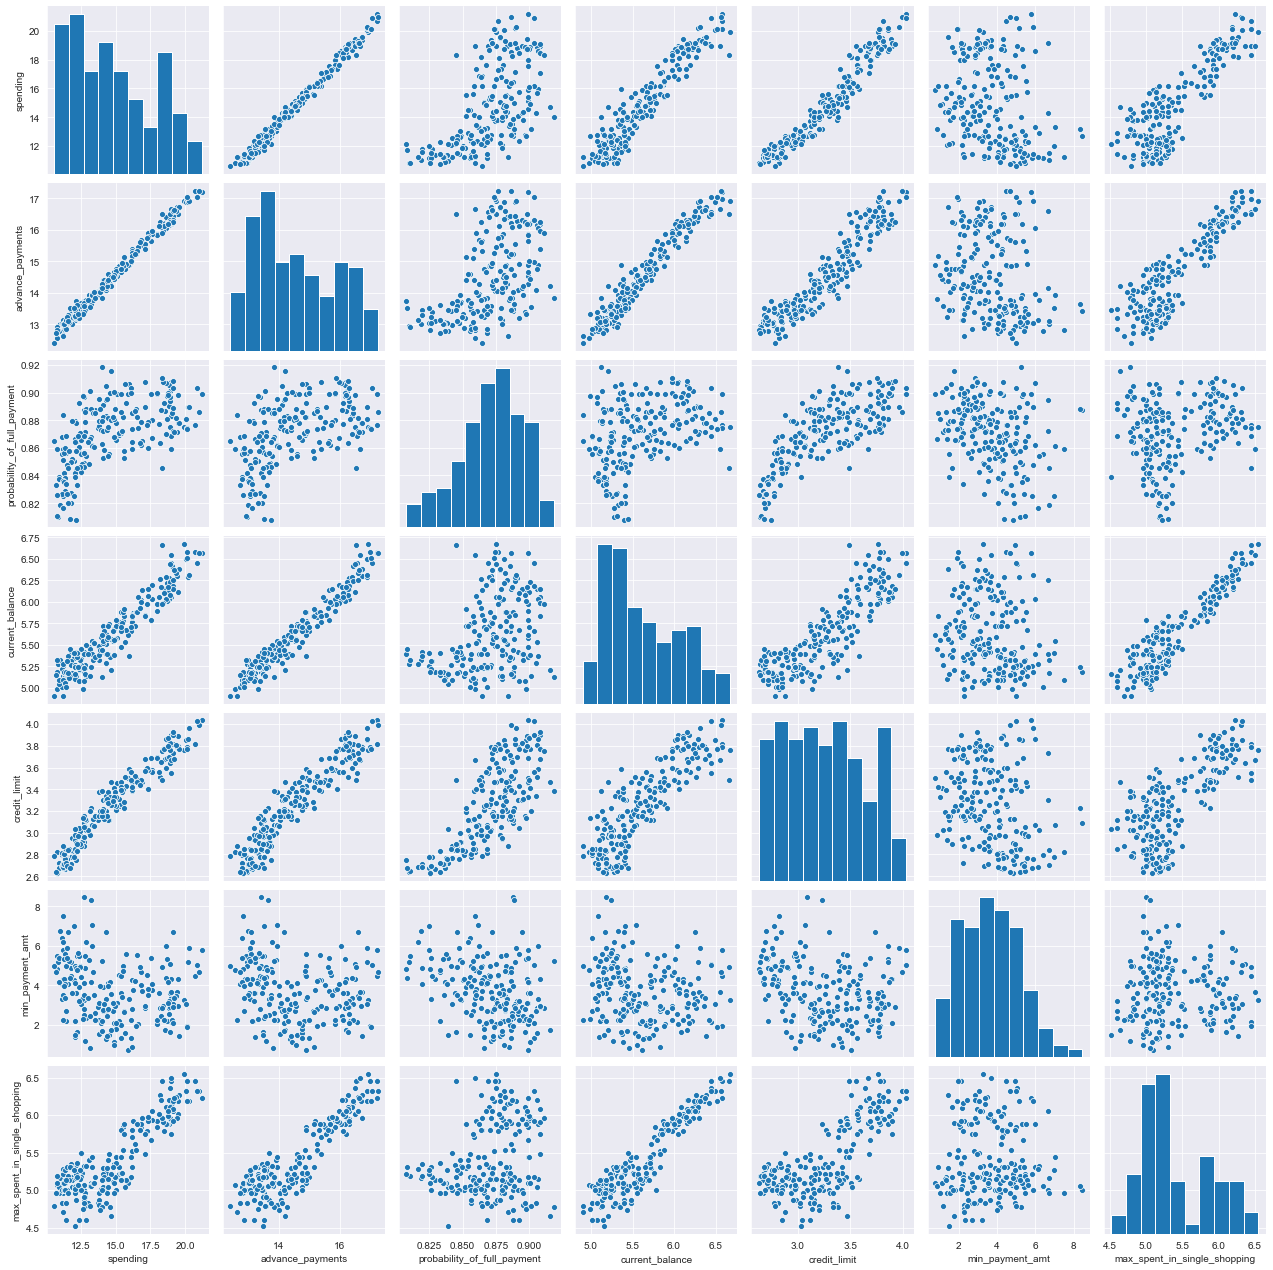

In [10]:
sns.pairplot(df)

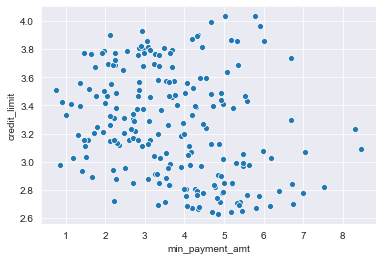

In [11]:
sns.scatterplot(data=df,x='min_payment_amt',y='credit_limit',palette='deep');

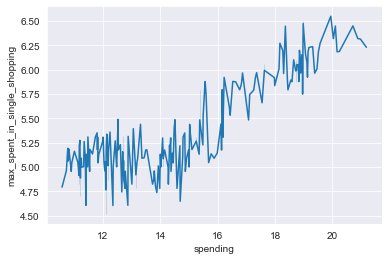

In [12]:
sns.lineplot(df['spending'],df['max_spent_in_single_shopping']);

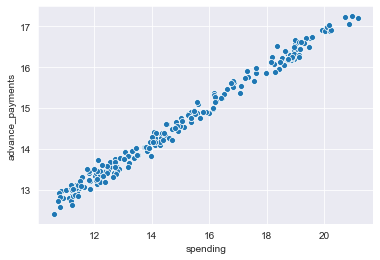

In [13]:
sns.scatterplot(df['spending'],df['advance_payments']);

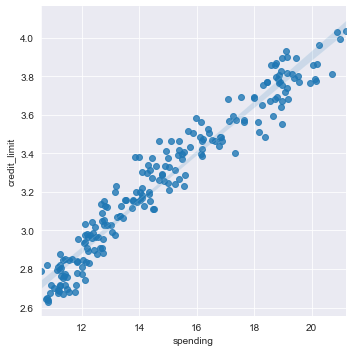

In [14]:
sns.lmplot(x='spending',y='credit_limit',data=df);

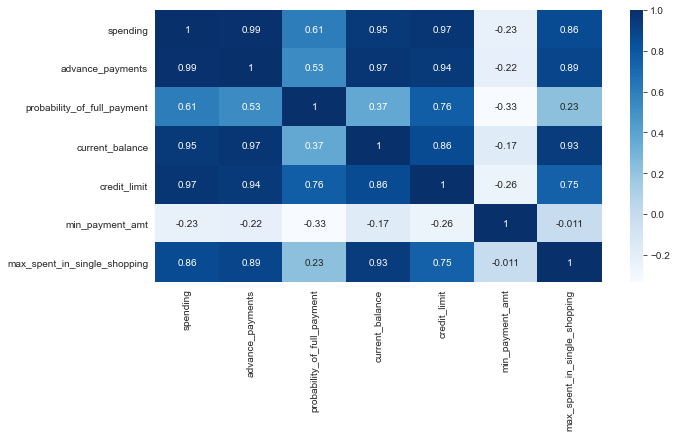

In [15]:
plt.figure(figsize = (10,5))  
sns.heatmap(df.corr(),annot=True,cmap='Blues'); 

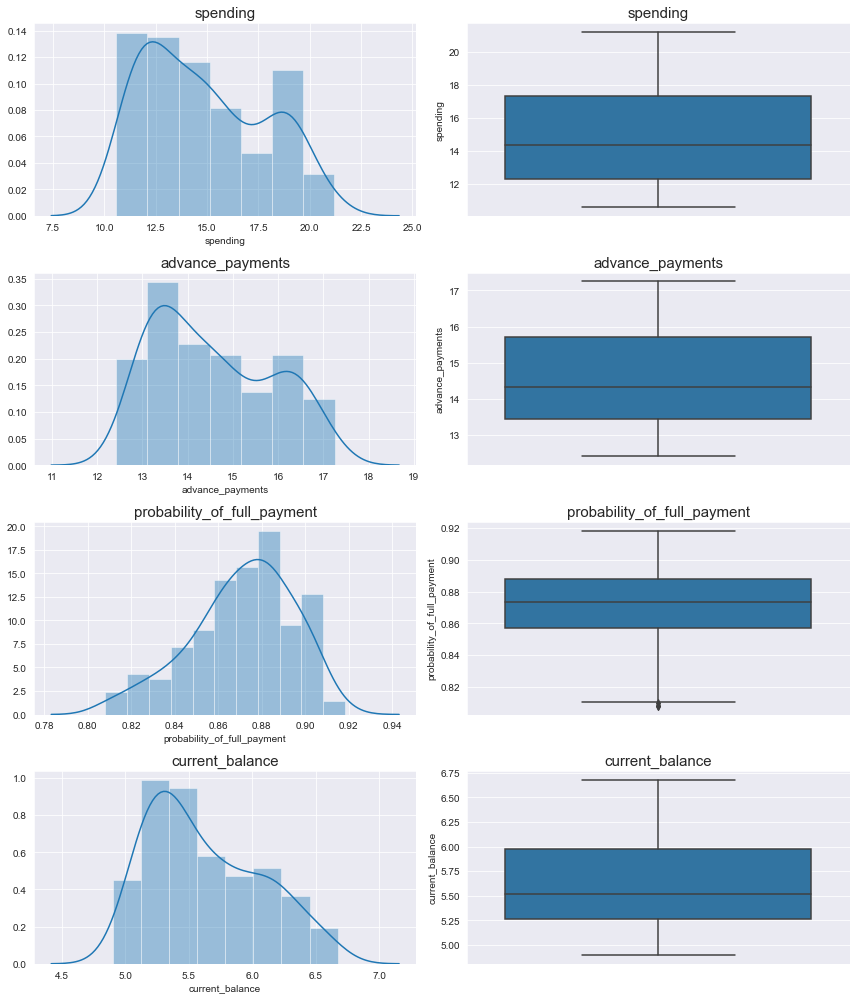

In [16]:
## Univariate except class column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['spending'],ax=axes[0][0])
a.set_title("spending",fontsize=15)
a = sns.boxplot(df['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending",fontsize=15)

a = sns.distplot(df['advance_payments'],ax=axes[1][0])
a.set_title("advance_payments",fontsize=15)
a = sns.boxplot(df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments",fontsize=15)

a = sns.distplot(df['probability_of_full_payment'],ax=axes[2][0])
a.set_title("probability_of_full_payment",fontsize=15)
a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment",fontsize=15)

a = sns.distplot(df['current_balance'],ax=axes[3][0])
a.set_title("current_balance",fontsize=15)
a = sns.boxplot(df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance",fontsize=15)

plt.tight_layout()
plt.show()

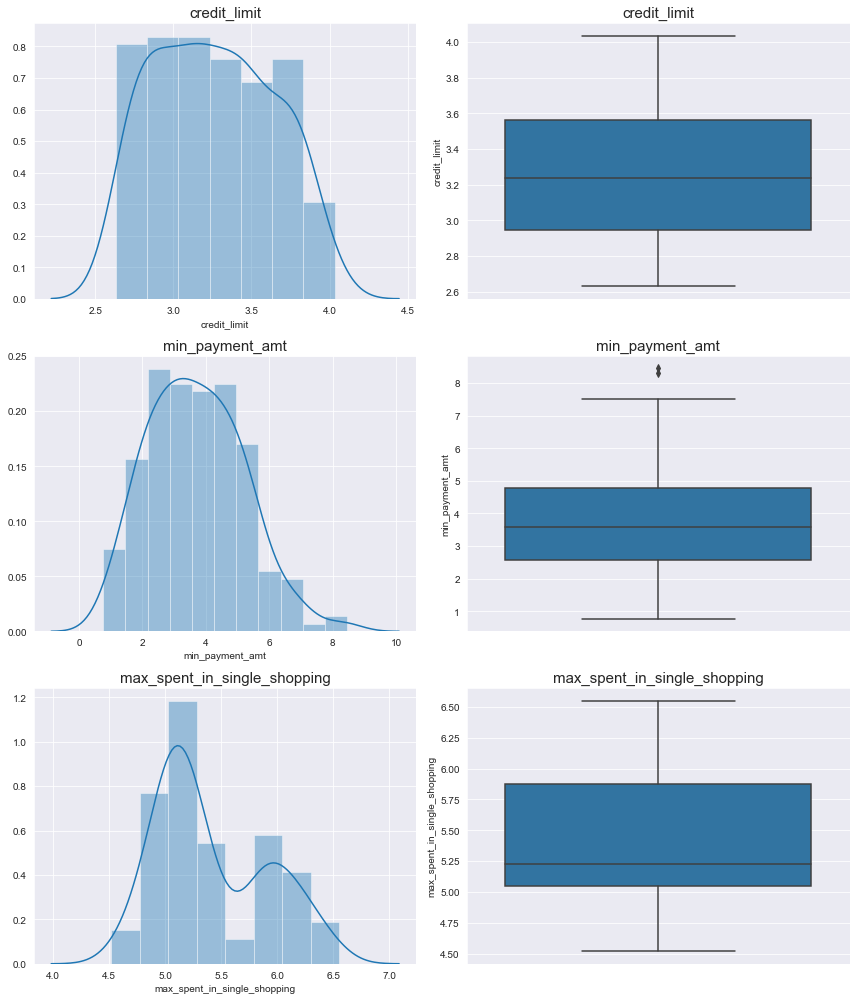

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['credit_limit'],ax=axes[0][0])
a.set_title("credit_limit",fontsize=15)
a = sns.boxplot(df['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit",fontsize=15)

a = sns.distplot(df['min_payment_amt'],ax=axes[1][0])
a.set_title("min_payment_amt",fontsize=15)
a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("min_payment_amt",fontsize=15)

a = sns.distplot(df['max_spent_in_single_shopping'],ax=axes[2][0])
a.set_title("max_spent_in_single_shopping",fontsize=15)
a = sns.boxplot(df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping",fontsize=15)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='min_payment_amt'>

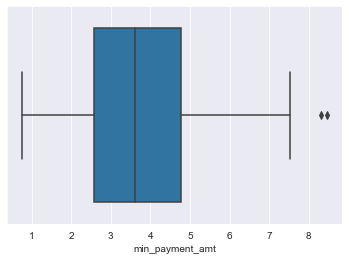

In [18]:
sns.boxplot(df['min_payment_amt'])

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [20]:
lrincome,urincome=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urincome,urincome,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrincome,lrincome,df['min_payment_amt'])


lrincome,urincome=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urincome,urincome,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrincome,lrincome,df['probability_of_full_payment'])

<AxesSubplot:xlabel='min_payment_amt'>

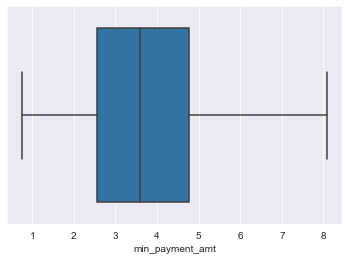

In [21]:
sns.boxplot(df['min_payment_amt'])

<AxesSubplot:xlabel='probability_of_full_payment'>

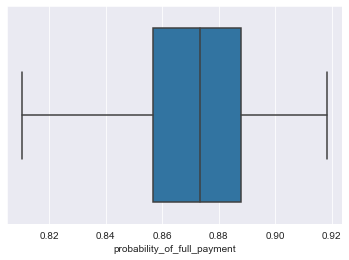

In [22]:
sns.boxplot(df['probability_of_full_payment'])

In [23]:
df.min_payment_amt.describe()

count    210.000000
mean       3.697288
std        1.494689
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.079625
Name: min_payment_amt, dtype: float64

<AxesSubplot:>

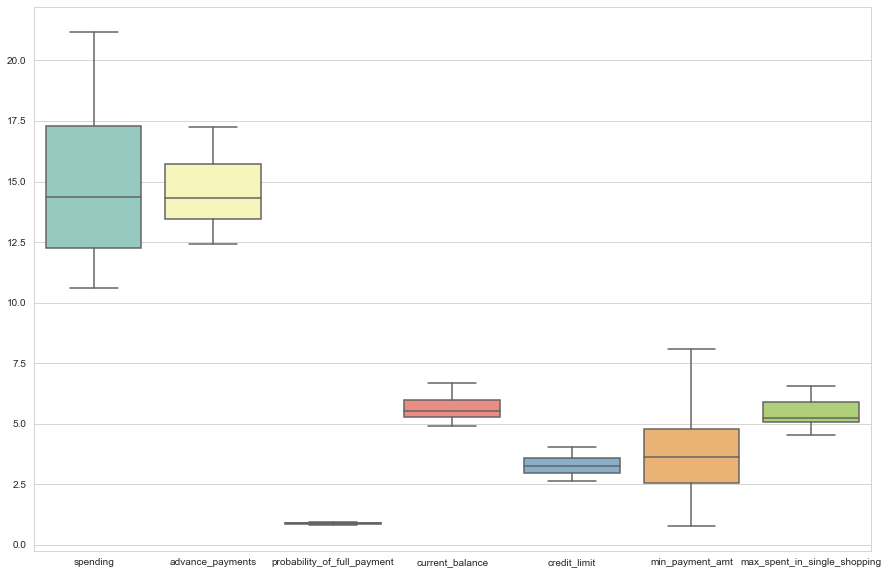

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(data=df,palette ='Set3')

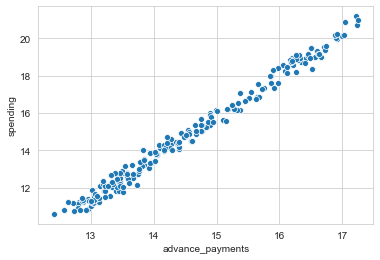

In [25]:
sns.scatterplot(df['advance_payments'],df['spending']);

(array([23., 26., 23., 25., 22., 26., 20., 13., 25.,  7.]),
 array([2.63  , 2.7703, 2.9106, 3.0509, 3.1912, 3.3315, 3.4718, 3.6121,
        3.7524, 3.8927, 4.033 ]),
 <BarContainer object of 10 artists>)

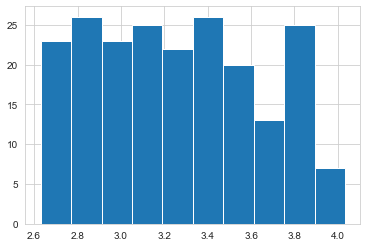

In [26]:
plt.hist(df['credit_limit'])

In [27]:
df.advance_payments

0      16.92
1      14.89
2      16.42
3      12.96
4      15.86
       ...  
205    14.02
206    15.62
207    14.16
208    15.00
209    15.15
Name: advance_payments, Length: 210, dtype: float64

In [28]:
df.groupby(['credit_limit'])['advance_payments'].sum().sort_values(ascending=False).head(10) 

credit_limit
3.026    41.10
3.857    33.09
3.769    32.35
3.755    32.31
3.594    32.14
3.485    31.52
3.465    30.12
3.113    29.21
3.312    29.05
3.377    28.91
Name: advance_payments, dtype: float64

In [29]:
df.groupby(['credit_limit'])['current_balance'].sum().sort_values(ascending=False).head(10) 

credit_limit
3.026    16.152
3.857    12.499
3.485    12.375
3.769    12.334
3.594    12.263
3.755    12.227
3.465    11.530
3.113    11.456
3.312    11.149
3.158    10.960
Name: current_balance, dtype: float64

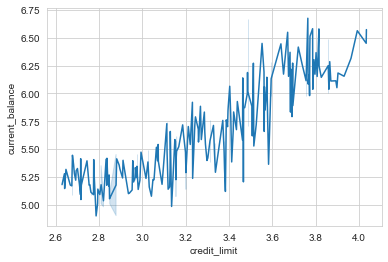

In [30]:
sns.lineplot(df['credit_limit'],df['current_balance']);

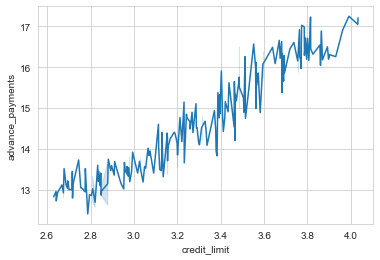

In [31]:
sns.lineplot(df['credit_limit'],df['advance_payments']);

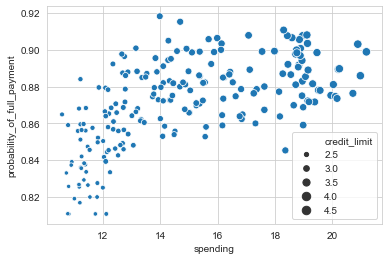

In [32]:
sns.scatterplot(x=df['spending'],y='probability_of_full_payment',data=df,size='credit_limit',palette='deep'); 

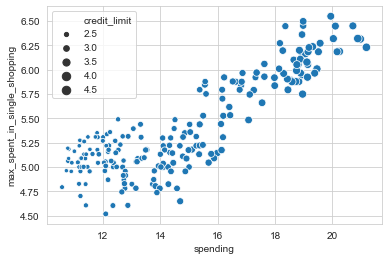

In [33]:
sns.scatterplot(x=df['spending'],y='max_spent_in_single_shopping',data=df,size='credit_limit',palette='deep'); 

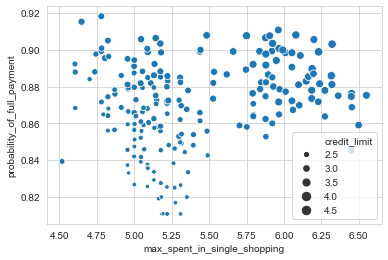

In [34]:
sns.scatterplot(x=df['max_spent_in_single_shopping'],y='probability_of_full_payment',data=df,size='credit_limit',palette='deep'); 

In [35]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [36]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


In [37]:
df.groupby(['credit_limit'])['min_payment_amt'].mean().sort_values(ascending=False).head(10) 

credit_limit
3.091    8.079625
3.232    8.079625
3.073    7.035000
2.776    6.992000
2.701    6.735000
2.845    6.715000
3.298    6.685000
3.737    6.682000
2.794    6.388000
2.687    6.169000
Name: min_payment_amt, dtype: float64

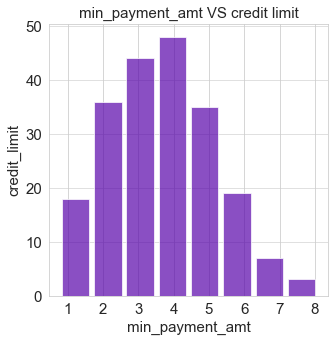

In [38]:
x=df.min_payment_amt
y=df.credit_limit
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#5804aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('min_payment_amt',fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.title('min_payment_amt VS credit limit',fontsize=15)
plt.show()

(array([13., 26., 35., 37., 35., 27., 22.,  6.,  6.,  3.]),
 array([0.7651   , 1.4965525, 2.228005 , 2.9594575, 3.69091  , 4.4223625,
        5.153815 , 5.8852675, 6.61672  , 7.3481725, 8.079625 ]),
 <BarContainer object of 10 artists>)

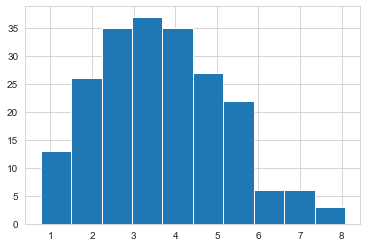

In [39]:
plt.hist(df['min_payment_amt'])


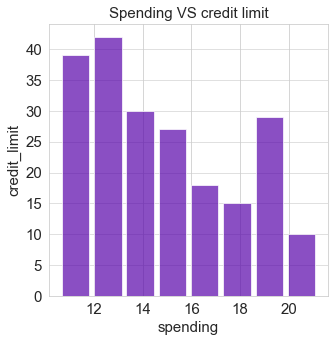

In [40]:
x=df.spending
y=df.credit_limit
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#5804aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('spending',fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.title('Spending VS credit limit',fontsize=15)
plt.show()

(array([32., 34., 22., 28., 22., 16., 10., 26., 13.,  7.]),
 array([10.59 , 11.649, 12.708, 13.767, 14.826, 15.885, 16.944, 18.003,
        19.062, 20.121, 21.18 ]),
 <BarContainer object of 10 artists>)

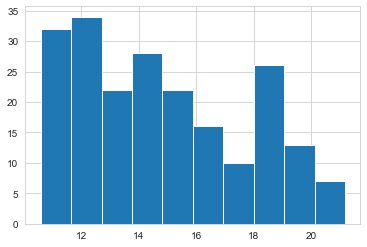

In [41]:
plt.hist(df['spending'])

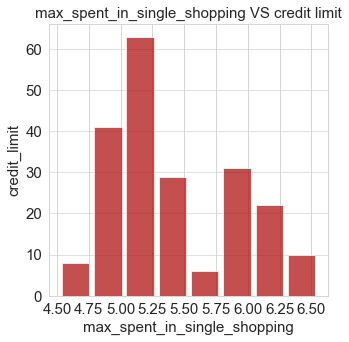

In [42]:
x=df.max_spent_in_single_shopping
y=df.credit_limit
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#aa0504',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('max_spent_in_single_shopping',fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.title('max_spent_in_single_shopping VS credit limit',fontsize=15)
plt.show()

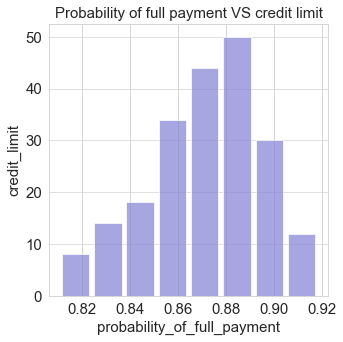

In [43]:
x=df.probability_of_full_payment
y=df.credit_limit
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#8281d4',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('probability_of_full_payment',fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.title('Probability of full payment VS credit limit',fontsize=15)
plt.show()

(array([ 8.,  7., 13., 16., 30., 38., 38., 27., 26.,  7.]),
 array([0.8105875 , 0.82135875, 0.83213   , 0.84290125, 0.8536725 ,
        0.86444375, 0.875215  , 0.88598625, 0.8967575 , 0.90752875,
        0.9183    ]),
 <BarContainer object of 10 artists>)

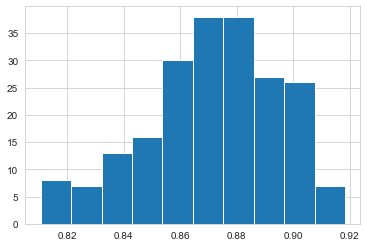

In [44]:
plt.hist(df['probability_of_full_payment'])

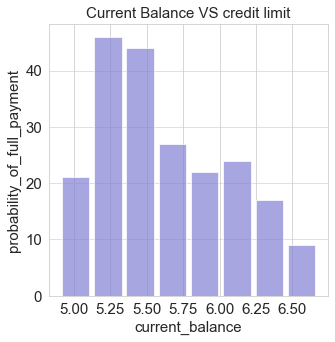

In [45]:
x=df.current_balance
y=df.probability_of_full_payment
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#8281d4',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('current_balance',fontsize=15)
plt.ylabel('probability_of_full_payment',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('probability_of_full_payment',fontsize=15)
plt.title('Current Balance VS credit limit',fontsize=15)
plt.show()

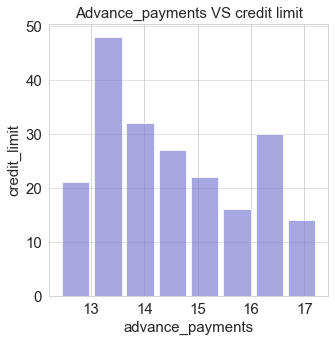

In [46]:
x=df.advance_payments
y=df.credit_limit
a=x
plt.figure(figsize=[5,5])
n, bins, patches = plt.hist(x=a, bins=8, color='#8281d4',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('advance_payments',fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('credit_limit',fontsize=15)
plt.title('Advance_payments VS credit limit',fontsize=15)
plt.show()

<AxesSubplot:xlabel='advance_payments', ylabel='credit_limit'>

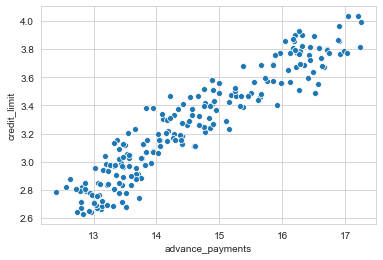

In [47]:
sns.scatterplot(df['advance_payments'],df['credit_limit'])

Text(0.5, 0.98, 'CREDIT LIMIT OF CUSTOMERS')

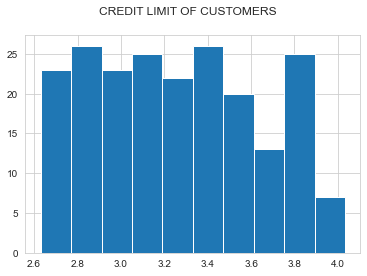

In [48]:
plt.hist(df['credit_limit'])
plt.suptitle("CREDIT LIMIT OF CUSTOMERS")


In [49]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


# HIERARCHICAL CLUSTERING

In [50]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
scaled_df = pd.DataFrame(std_scale.fit_transform(df)) 
scaled_df

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


In [51]:
scaled_df.columns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'] 

In [52]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [53]:
wardlink=linkage(scaled_df,method = 'ward')

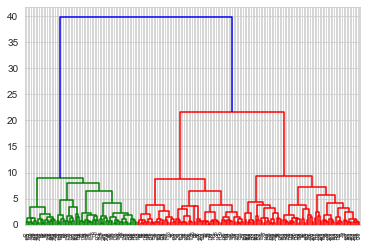

In [54]:
dend=dendrogram(wardlink)

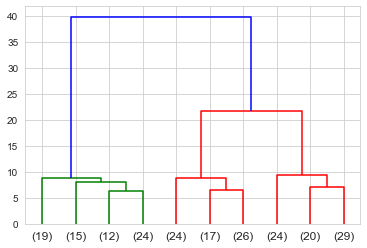

In [55]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)

In [56]:
from scipy.cluster.hierarchy import fcluster

In [57]:
clusters = fcluster(wardlink,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [58]:
df['clusters']=clusters

In [59]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [60]:
df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [61]:
aggdata=df.groupby('clusters').mean()
aggdata['Frequency']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# USING AGGLOMERATIVE

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(scaled_df)
print(Cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [64]:
df["Agglo_CLusters"]=Cluster_agglo

In [65]:
df.Agglo_CLusters.value_counts().sort_index()

0    73
1    70
2    67
Name: Agglo_CLusters, dtype: int64

In [66]:
agglo_data=df.drop(['clusters'],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67


In [67]:
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# K MEANS

In [68]:
df2 = pd.read_csv('bank_marketing_part1_Data.csv')

In [69]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
scaled_df1 = pd.DataFrame(std_scale.fit_transform(df2)) 
scaled_df1

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [70]:
from sklearn.cluster import KMeans 

In [71]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df1)
k_means.inertia_

1470.0

In [72]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df1)
k_means.inertia_

659.1717544870407

In [73]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
k_means.inertia_

430.65897315130053

In [74]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df1)
k_means.inertia_

371.38509060801096

In [75]:
k_means.labels_

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [76]:
wss=[]

In [77]:
for i in range (1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [78]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.301721277542,
 328.3851957236699,
 288.66177102306926,
 262.9968258757828,
 240.6191090035834,
 223.91900526884882,
 205.79545986796916]

<AxesSubplot:>

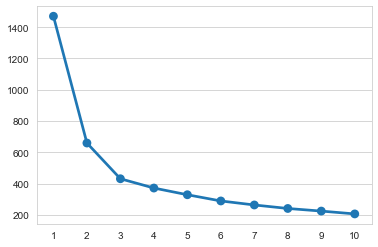

In [79]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss)

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [81]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
silhouette_score(scaled_df1,labels,random_state=1) 


0.4007270552751299

In [82]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df1)
labels= k_means.labels_
silhouette_score(scaled_df1,labels,random_state=1) 


0.46577247686580914

In [83]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
silhouette_score(scaled_df1,labels,random_state=1) 


0.3276547677266193

In [84]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df1)
labels = k_means.labels_
silhouette_score(scaled_df1,labels,random_state=1) 


0.4007270552751299

In [85]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [86]:
df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,2


In [87]:
df.Clus_kmeans3.value_counts().sort_index()

0    71
1    72
2    67
Name: Clus_kmeans3, dtype: int64

In [88]:
clust_profile=df.drop(['clusters','Agglo_CLusters'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


In [89]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_CLusters,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,2
